## Visión por Computador

Basándote en el cuaderno visto en 03_pytorch_computer_vision.ipynb y utilizando el dataset EMNIST, realiza los siguientes pasos:

In [138]:
# Importaciones iniciales

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


### Analiza y visualiza tus datos

Carga de los datos

In [141]:
from torchvision import datasets, transforms

transform = transforms.ToTensor()

train_data = datasets.EMNIST(
    root=".",
    split="balanced",   
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.EMNIST(
    root=".",
    split="balanced",    
    train=False,
    download=True,
    transform=transform
)


Análisis de los datos

In [143]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0275, 0.1255, 0.1412, 0.0824, 0.0118, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314,
           0.1294, 0.4431, 0.4863, 0.3176, 0.0863, 0.0275, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [144]:
class_names = train_data.classes
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [145]:
class_names = train_data.classes
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [146]:
print(f"Forma de la imagen: {image.shape} -> [color_channels, height, width]")
print(f"Etiqueta de la imagen: {label} -> {class_names[label]}")

Forma de la imagen: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Etiqueta de la imagen: 45 -> r


Visualización de los datos

Forma de la imagen: torch.Size([1, 28, 28])


Text(0.5, 1.0, '45')

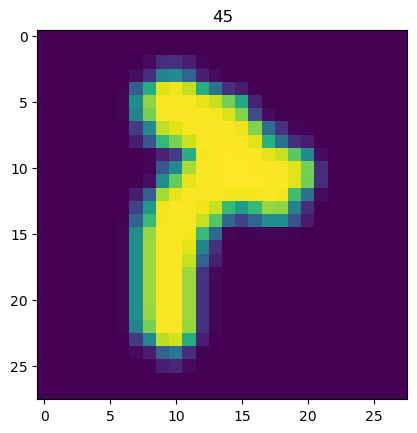

In [148]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Forma de la imagen: {image.shape}")
plt.imshow(image.squeeze()) 
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

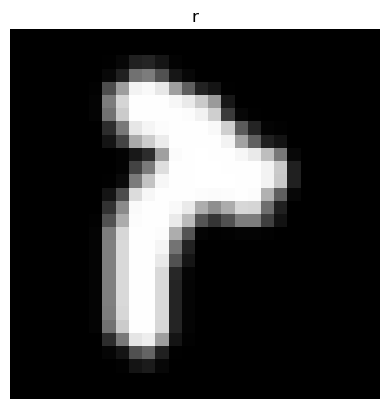

In [149]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

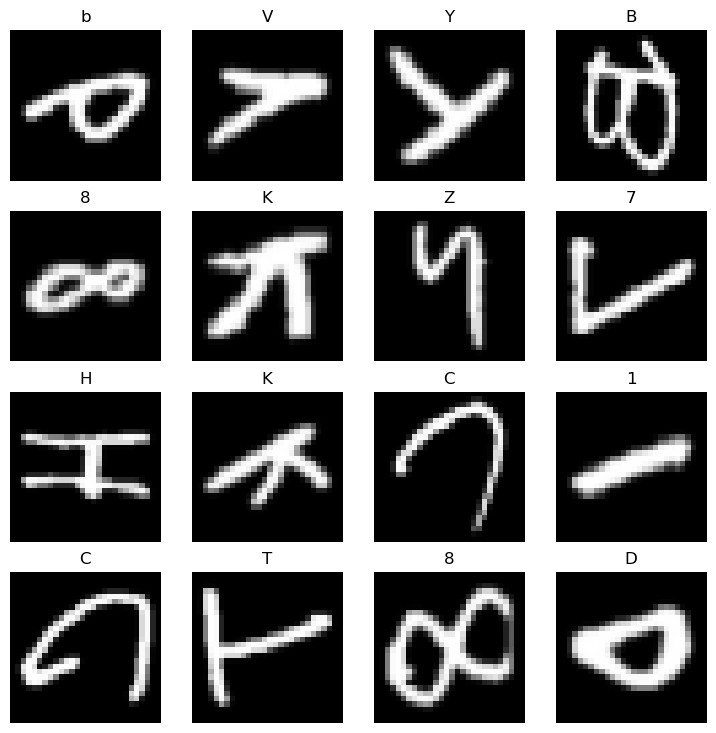

In [150]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() 
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

### Prepara el modelo DataLoader correspondiente

In [152]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x243a3d93440>,
 <torch.utils.data.dataloader.DataLoader at 0x243b34c31a0>)

Comprobación del DataLoader preparado

In [154]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Longitud de train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Longitud de test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000243A3D93440>, <torch.utils.data.dataloader.DataLoader object at 0x00000243B34C31A0>)
Longitud de train_dataloader: 3525 batches of 32
Longitud de test_dataloader: 588 batches of 32


In [155]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Tamaño de la imagen: torch.Size([1, 28, 28])
Etiqueta: 30, tamaño de la etiqueta: torch.Size([])


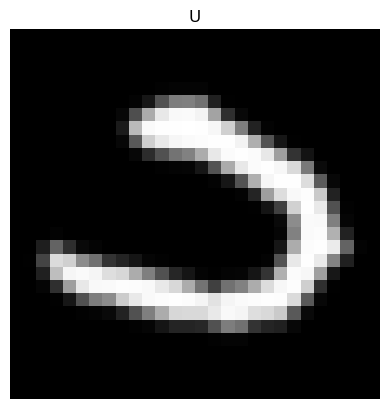

In [156]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Tamaño de la imagen: {img.shape}")
print(f"Etiqueta: {label}, tamaño de la etiqueta: {label.shape}")

### Crea el modelo que estimes más adecuado para poder realizar la clasificación correspondiente en este problema multiclase

In [158]:
import torch
from torch import nn

class EMNISTModel(nn.Module):
    def __init__(self, input_shape: int, num_classes: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=3, stride=1, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) 
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*7*7, out_features=128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=128, out_features=num_classes)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x


### Establecer device agnostic-code

In [160]:

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")


Usando dispositivo: cpu


In [161]:
# Montar el modelo con parámetros de entrada 

model = EMNISTModel(input_shape=1, num_classes=len(class_names))
model.to(device)


EMNISTModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=47, bias=True)
  )
)

In [162]:
dummy_x = torch.rand([1, 1, 28, 28])
model(dummy_x).shape

torch.Size([1, 47])

In [163]:
model.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[-0.1596, -0.2713,  0.2795],
                        [-0.1334,  0.0883, -0.1157],
                        [ 0.0271,  0.3108,  0.1536]]],
              
              
                      [[[-0.2889,  0.1323,  0.3164],
                        [ 0.0877,  0.2235,  0.3286],
                        [-0.0511,  0.0692, -0.2317]]],
              
              
                      [[[-0.0687,  0.2469,  0.1709],
                        [-0.2109, -0.2673, -0.2278],
                        [-0.3290, -0.2572, -0.0824]]],
              
              
                      [[[ 0.2250,  0.0558, -0.2535],
                        [-0.2674,  0.1658, -0.2479],
                        [-0.0410,  0.1599, -0.1543]]],
              
              
                      [[[-0.0363, -0.0290, -0.0789],
                        [-0.1690, -0.2971, -0.2695],
                        [-0.1785,  0.3219, -0.1610]]],
              
              
       

### Establece las funciones de pérdida, optimización y las métricas que consideres necesarias para evaluar

In [165]:
import requests
from pathlib import Path

# Descarga de las funciones
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [166]:
from helper_functions import accuracy_fn

# Setup de las funciones de perdida y optimización
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

### Crea funciones para el bucle de entrenamiento y test

In [168]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
 
  total_time = end-start
  print(f"Tiempo de entrenamiento en {device}: {total_time:.3f} seconds")
  return total_time

In [169]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Tiempo de entrenamiento en cpu: 0.000 seconds


2.0900000890833326e-05

### Medir tiempos

In [171]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_trime_start_on_cpu = timer()
epochs = 3

# Crear el bucle de entrenamiento y prueba
for epoch in tqdm(range(epochs)):
  print(f"Época: {epoch} \n-----")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model.train()
    # 1. Propagación hacia adelante (Forward pass)
    y_pred = model(X)

    # 2. Calcular la pérdida (por lote)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # Acumular la pérdida de entrenamiento

    # 3. Reiniciar gradientes del optimizador
    optimizer.zero_grad()

    # 4. Propagación hacia atrás (Backward)
    loss.backward()

    # 5. Paso del optimizador (actualizar pesos)
    optimizer.step()

    # Mostrar el progreso
    if batch % 400 == 0:
      print(f"Revisado {batch * len(X)}/{len(train_dataloader.dataset)} muestras.")

  # Dividir la pérdida total entre la longitud del dataloader de entrenamiento
  train_loss /= len(train_dataloader)

  ### Evaluación/Test
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Propagación hacia adelante
      test_pred = model(X_test)

      # 2. Calcular la pérdida (acumulativamente)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calcular precisión
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calcular el promedio de pérdida de test por lote
    test_loss /= len(test_dataloader)

    # Calcular el promedio de precisión de test por lote
    test_acc /= len(test_dataloader)

  # Mostrar los resultados de esta época
  print(f"Pérdida entrenamiento: {train_loss:.4f} | Pérdida test: {test_loss:.4f}, Precisión test: {test_acc:.4f}")

# Calcular el tiempo total de entrenamiento
train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start=train_trime_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Época: 0 
-----
Revisado 0/112800 muestras.
Revisado 12800/112800 muestras.
Revisado 25600/112800 muestras.
Revisado 38400/112800 muestras.
Revisado 51200/112800 muestras.
Revisado 64000/112800 muestras.
Revisado 76800/112800 muestras.
Revisado 89600/112800 muestras.
Revisado 102400/112800 muestras.
Pérdida entrenamiento: 0.8955 | Pérdida test: 0.4692, Precisión test: 84.2847
Época: 1 
-----
Revisado 0/112800 muestras.
Revisado 12800/112800 muestras.
Revisado 25600/112800 muestras.
Revisado 38400/112800 muestras.
Revisado 51200/112800 muestras.
Revisado 64000/112800 muestras.
Revisado 76800/112800 muestras.
Revisado 89600/112800 muestras.
Revisado 102400/112800 muestras.
Pérdida entrenamiento: 0.4815 | Pérdida test: 0.4134, Precisión test: 85.6239
Época: 2 
-----
Revisado 0/112800 muestras.
Revisado 12800/112800 muestras.
Revisado 25600/112800 muestras.
Revisado 38400/112800 muestras.
Revisado 51200/112800 muestras.
Revisado 64000/112800 muestras.
Revisado 76800/112800 muestras.
Revisa

In [172]:
str(next(model.parameters()).device)

'cpu'

### Realiza predicciones sobre tu modelo y almacena los resultados

In [174]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Devuelve un diccionario con los resultados de la predicción del modelo sobre data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Realizar predicciones
      y_pred = model(X)

      # Acumular los valores de pérdida y precisión por lote
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Escalar pérdida y precisión para obtener el promedio por lote
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name": model.__class__.__name__,  # Solo funciona si el modelo fue creado con una clase
      "model_loss": loss.item(),
      "model_acc": acc
  }

# Evaluar el modelo y guardar los resultados
model_results = eval_model(model=model,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_results

  0%|          | 0/588 [00:00<?, ?it/s]

{'model_name': 'EMNISTModel',
 'model_loss': 0.39061155915260315,
 'model_acc': 86.36798469387755}

### Si tu modelo no es adecuado, realiza las mejoras que estimes oportunas para alcanzar mejores valores y justifícalas

Considero que mi modelo devuelve unos resultados aceptables, por lo que no sería necesario mejorarlo. 

### Crea una matriz de confusión para evaluar la predicción

In [178]:
from tqdm.auto import tqdm

# 1. Hacer predicciones con el modelo entrenado
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Realizando predicciones..."):
    # Enviar los datos y etiquetas al dispositivo de destino
    X, y = X.to(device), y.to(device)
    # Realizar la pasada hacia adelante
    y_logit = model(X)
    # Convertir las predicciones de logits -> probabilidades -> etiquetas
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Mover la predicción a CPU para la evaluación
    y_preds.append(y_pred.cpu())

  # Concatenar la lista de predicciones en un solo tensor
  print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]


Realizando predicciones...:   0%|          | 0/588 [00:00<?, ?it/s]

[tensor([41, 39,  9, 26, 44, 43, 14, 11,  3, 18, 16,  7,  2, 16,  0, 27,  6,  0,
        28, 43, 29,  8,  4, 36, 24, 15, 39, 34, 37, 22, 12, 21]), tensor([28, 15, 43, 12, 20, 26, 12,  1, 42, 13,  8, 23,  3,  5,  7, 25, 18, 14,
        16, 31, 41, 21, 36, 17,  9, 28, 34, 35,  0, 39, 33, 40]), tensor([20,  2, 41,  9, 18, 36, 38, 26, 14, 27, 14, 43, 15,  8,  3, 35, 45, 17,
        28, 33, 12, 32, 31, 11, 13, 40, 29, 16, 30, 24, 25,  1]), tensor([12,  9,  5, 42, 23,  2,  4, 16, 19, 35, 24, 11, 22, 22, 45, 46,  4, 30,
        27,  6, 29, 25,  8, 44, 32, 34,  3,  2, 17,  1, 26, 38]), tensor([45, 39, 45, 30, 29, 11, 38, 28, 26, 42, 40, 13, 10, 33, 12,  5, 25,  6,
        36,  0, 12, 19,  9, 12, 17, 13,  7, 34, 14, 46, 23, 20]), tensor([15, 32,  7,  8,  5, 22,  4, 27, 30, 18, 28, 35,  6, 33, 46, 10, 28, 25,
        38,  7,  0,  1, 14,  9, 42, 13, 26,  4,  3, 40, 20, 29]), tensor([39, 21, 24, 36,  1,  4, 22, 13,  3, 24,  8, 46, 37, 10, 16, 39, 11, 40,
        10, 28, 28, 33, 18, 25, 32, 29, 20,

In [179]:
len(y_pred_tensor)

18800

In [180]:
# Comprobar si los paquetes necesarios están instalados
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install torchmetrics mlxtend --quiet
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [181]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [182]:
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [183]:
y_pred_tensor[:10]

tensor([41, 39,  9, 26, 44, 43, 14, 11,  3, 18])

In [184]:
test_data.targets

tensor([41, 39,  9,  ...,  1, 26, 33])

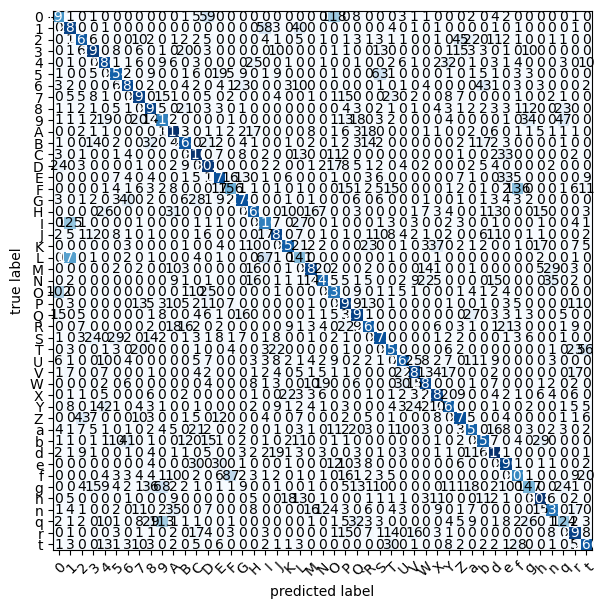

In [185]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Crear instancia y calcular matriz
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Visualizar
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)


### Guarda el modelo y cárgalo comprobando que se ha cargado correctamente

In [187]:
from pathlib import Path
import torch

# Crear carpeta y ruta de guardado
MODEL_PATH = Path("./models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "03_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Guardar estado del modelo
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
print(f"Modelo guardado en {MODEL_SAVE_PATH}")


Modelo guardado en models\03_exercise_model.pth


In [191]:
# Instanciar y cargar el modelo previamente definido
loaded_model = EMNISTModel(input_shape=1, num_classes=len(class_names))  
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))
loaded_model.to(device)


EMNISTModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=47, bias=True)
  )
)

In [189]:
model_results

{'model_name': 'EMNISTModel',
 'model_loss': 0.39061155915260315,
 'model_acc': 86.36798469387755}

In [193]:
# Evaluar modelo cargado 
loaded_model_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
print(loaded_model_results)


  0%|          | 0/588 [00:00<?, ?it/s]

{'model_name': 'EMNISTModel', 'model_loss': 0.39061155915260315, 'model_acc': 86.36798469387755}
